In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.observation import Exposure
from src.calibration import calibrate
from src.analysis import gaussian_fit

## Radial velocity to Rotation Velocity (Tangent Point Method)

$V_{r,\rm max} = V_{\rm rot}(R) - V_{\odot} \text{cos}(90^\circ-\ell)$ <br>
$ R = R_0 \text{sin} \ell$

loading 40 files
loading 70 files
loading 40 files
Component 1: μ = 8.42 ± 0.62, σ = 22.68 ± 0.51, A = 31.08 ± 1.14
Component 2: μ = -1.89 ± 0.31, σ = 6.99 ± 0.41, A = 26.11 ± 1.32


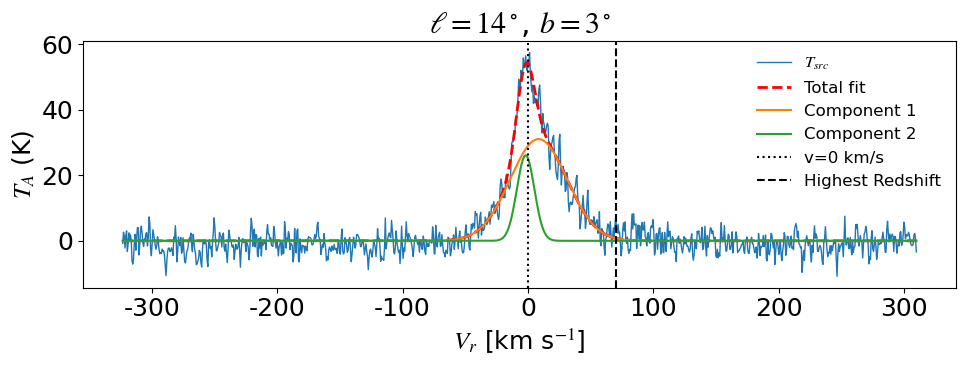

V_LSR = 123.22 km/s


In [6]:
l = 14
b = 3
v_highest = 70

p0 = [[0, 30, 40], [10, 10, 20]]


V_r, T_src = calibrate(l=l, b=b, plot=False, demo=True)
sky = Exposure.from_file(l=l, b=b, type="sky", demo=True)  # just for l, b

fig, ax = gaussian_fit(V_r, T_src, p0, obj=sky)

# Try highest red/blueshift here!
ax.axvline(v_highest, c="k", ls="--", label=f"Highest {'Redshift' if sky.l > 0 and sky.l < 90 else 'Blueshift'}")


ax.set_title(rf"$\ell = {sky.l}^\circ$, $b = {sky.b}^\circ$")
ax.legend(fontsize=12)
plt.show()

print(f"V_LSR = {v_highest + 220 * np.sin(np.deg2rad(sky.l)):.2f} km/s")

Text(0.5, 1.0, 'Team 1')

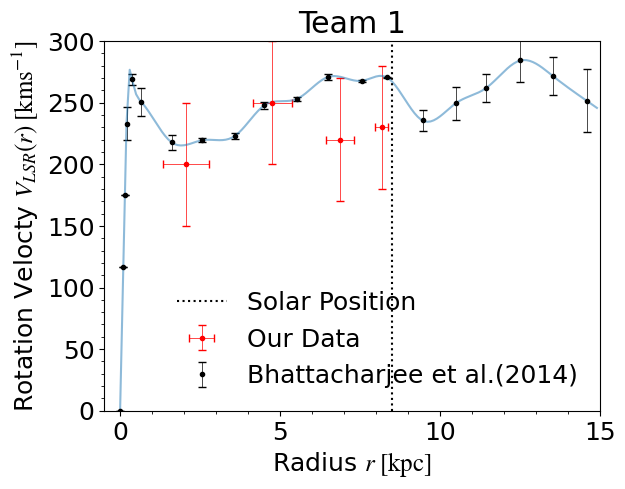

In [4]:
from src.analysis import plot_archive_rotation_curve

# Fill in below
l = [14, 34, 54, 74]
l_err = [5] * len(l)  # empirical antenna pointing error


V_r = [200, 250, 220, 230]
V_r_err = [50] * len(V_r)  # arbitrary error

r_sun = 8.5  # kpc
r = r_sun * np.sin(np.deg2rad(l))
r_err = r_sun * np.cos(np.deg2rad(l)) * np.deg2rad(l_err)

plt.errorbar(
    r,
    V_r,
    xerr=r_err,
    yerr=V_r_err,
    color="r",
    label="Our Data",
    ls="None",
    capsize=3,
    marker="o",
    ms=3,
    lw=0.5,
)

plot_archive_rotation_curve()
plt.title("Team 1")